In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [81]:
diabetic7 = pd.read_csv("./dataset_diabetes/diabetic7.csv")

In [56]:
diabetic7.shape

(84432, 44)

In [57]:
diabetic7.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'citoglipton', 'insulin',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'target', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2', 'medical_specialty_new',
       'discharge_id', 'admission_id'],
      dtype='object')

In [82]:
diabetic7 = diabetic7.drop(['admission_type_id'], axis=1)

In [83]:
diabetic7.dtypes

race                      object
gender                    object
age                       object
time_in_hospital           int64
num_lab_procedures         int64
num_procedures             int64
num_medications            int64
number_outpatient          int64
number_emergency           int64
number_inpatient           int64
number_diagnoses           int64
max_glu_serum             object
A1Cresult                 object
metformin                 object
repaglinide               object
nateglinide               object
chlorpropamide            object
acetohexamide             object
glipizide                 object
glyburide                 object
tolbutamide               object
pioglitazone              object
rosiglitazone             object
acarbose                  object
miglitol                  object
citoglipton               object
insulin                   object
metformin-pioglitazone    object
change                    object
diabetesMed               object
target    

In [85]:
numlist = list(diabetic7.select_dtypes("int64").columns)
numlist.remove('self_pay')
numlist.remove('medicaid/medicare')
numlist.remove('coverByInsurance')
numlist.remove('clustering3')
numlist.remove('clustering4')
numlist.remove('clustering2')
numlist.remove('target')

In [108]:
numerical = list(numlist)
scale = StandardScaler()

In [87]:
for i in numerical:
    diabetic7[numerical] = scale.fit_transform(diabetic_std[numerical])

In [89]:
diabetic7.dtypes

race                       object
gender                     object
age                        object
time_in_hospital          float64
num_lab_procedures        float64
num_procedures            float64
num_medications           float64
number_outpatient         float64
number_emergency          float64
number_inpatient          float64
number_diagnoses          float64
max_glu_serum              object
A1Cresult                  object
metformin                  object
repaglinide                object
nateglinide                object
chlorpropamide             object
acetohexamide              object
glipizide                  object
glyburide                  object
tolbutamide                object
pioglitazone               object
rosiglitazone              object
acarbose                   object
miglitol                   object
citoglipton                object
insulin                    object
metformin-pioglitazone     object
change                     object
diabetesMed   

In [90]:
categorical = diabetic7.select_dtypes(include = ["object"]).columns
numerical = diabetic7.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
diabetic7_categorical = diabetic7[categorical]
diabetic7_numerical = diabetic7[numerical]

Number of Categorical features: 28
Number of Numerical features: 15


In [91]:
le = preprocessing.LabelEncoder()

In [92]:
categorical= list(categorical)

In [93]:
for i in categorical:
    diabetic7[i] = le.fit_transform(diabetic7[i])

In [94]:
diabetic7.dtypes

race                        int64
gender                      int64
age                         int64
time_in_hospital          float64
num_lab_procedures        float64
num_procedures            float64
num_medications           float64
number_outpatient         float64
number_emergency          float64
number_inpatient          float64
number_diagnoses          float64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol                    int64
citoglipton                 int64
insulin                     int64
metformin-pioglitazone      int64
change                      int64
diabetesMed   

In [74]:
diabetic7.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'citoglipton', 'insulin', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'target', 'self_pay', 'medicaid/medicare',
       'coverByInsurance', 'f_diag', 's_diag', 't_diag', 'clustering3',
       'clustering4', 'clustering2', 'medical_specialty_new', 'discharge_id',
       'admission_id'],
      dtype='object')

In [95]:
answer = diabetic7['target']
diabetic7 = diabetic7.drop(['target'], axis=1)

In [96]:
#divide the dataset into train/test 7:3?
X_train, X_test, y_train, y_test = train_test_split(diabetic7, answer, test_size = 0.3, random_state = 0, stratify=answer, shuffle=True)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (59102, 42)
X_test : (25330, 42)
y_train : (59102,)
y_test : (25330,)


In [97]:
model=XGBClassifier(random_state=0, class_weight = {0:1, 1:8})

In [24]:
n_trees_range = range(10,300, 4)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    model.set_params(n_estimators=n_trees, random_state=42, scale_pos_weight = 8, max_depth=6, n_jobs = -1)
    model.fit(X_train, y_train)
    train_error2.append(1 - model.score(X_train, y_train))
    test_error2.append(1 - model.score(X_test, y_test))

In [17]:
model.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 8},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=66, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=8, seed=None, silent=True,
       subsample=1)>

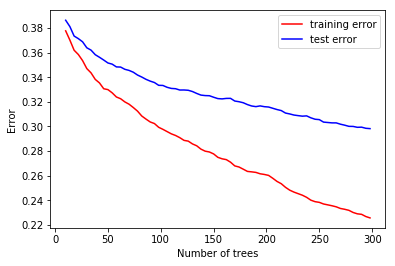

In [25]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [253]:
confusion_matrix(y_train, model.predict(X_train))

array([[33269, 19103],
       [ 2283,  4447]])

In [147]:
#randomized searchcv to find the range of the hyperparameters of the XGboost


cv = StratifiedKFold(shuffle  = True, n_splits = 4)
n_estimators = [260, 280,300]
scale_pos_weight = [8,9]
min_samples_split = [2, 4, 6,8,10]
min_samples_leaf = min_samples_leaf = [1, 2, 4]
min_child_weight = [1,6,12]
colsample_bytree = [0.1, 0.5, 0.9]
gamma = [0.2, 0.5, 0.8]
learning_rate =  [0.02, 0.06, 0.1] # default 0.1 
max_depth =  [int(x) for x in np.linspace(10, 110, num = 11)]# default 3
subsample =  [0.2, 0.5, 0.9]
reg_alpha=[0.2, 0.4, 0.7, 0.9] 

random_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'min_child_weight': min_child_weight,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha,
               'njobs': [-1],
               'scale_pos_weight': scale_pos_weight}

rand_search_rf = RandomizedSearchCV(model, random_para, cv=cv)
rand_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 1, 1: 8},
       colsample_bylevel=1, colsample_bytree=0.6, gamma=0.8,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=7, min_samples_leaf=1, min_samples_split=4,
       missing=None, n_estimators=280, n_jobs=1, njobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0.4,
       reg_lambda=1, scale_pos_weight=9, seed=None, silent=True,
       subsample=0.9),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [260, 280, 300], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'gamma': [0.2, 0.5, 0.8], 'min_child_weight': [1, 6, 12], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.02, 0.06, 0.1], 'subsample':

In [ ]:
#taking risks scores for variables/groups
#take out a hold-out sample of observations
#risk-table - for categories 
#risk features

In [ ]:
#auc - validation easily feasible
#true positive/false positive rates 
#classify a group as risk group -> average of highest and lowest risk groups

In [148]:
rand_search_rf.best_params_

{'subsample': 0.9,
 'scale_pos_weight': 9,
 'reg_alpha': 0.2,
 'njobs': -1,
 'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'min_child_weight': 1,
 'max_depth': 70,
 'learning_rate': 0.06,
 'gamma': 0.8,
 'colsample_bytree': 0.5}

In [171]:
#fit the model and get auc score

In [ ]:
#randomized searchcv to find the range of the hyperparameters of the XGboost

cv = StratifiedKFold(shuffle  = True, n_splits = 4)
n_estimators = [300]
scale_pos_weight = [9]
min_child_weight = [1,6,12]
colsample_bytree = [0.9]
gamma = [0.8, 0.9]
learning_rate =  [0.05, 0.06, 0.07] # default 0.1 
max_depth =  [60, 70, 80]
subsample =  [0.9]
reg_alpha=[0.1, 0.2] 

random_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'min_child_weight': min_child_weight,
               'min_samples_split': [5],
               'min_samples_leaf': [2],
               'learning_rate': learning_rate,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': [0.4],
               'njobs': [-1],
               'scale_pos_weight': scale_pos_weight}

rand_search_rf = RandomizedSearchCV(model, random_para, cv=cv)
rand_search_rf.fit(X_train, y_train)
rand_search_rf.best_params_

In [ ]:
###Grid Search
#better practice would be to run randomized searchcv first to narrow down the range
#then run gridsearchcv

cv = StratifiedKFold(shuffle  = True, n_splits = 4)
n_estimators = [300,320,340]
scale_pos_weight = [9]
min_child_weight = [1]
colsample_bytree = [0.9]
gamma = [0.9]
learning_rate =  [0.045,0.05, 0.055] # default 0.1 
max_depth =  [55,60,65]
subsample =  [0.9]
reg_alpha=[0.3,0.4,0.5] 

grid_para = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma':gamma,
               'mian_child_weight': min_child_weight,
               'min_samples_split': [5],
               'min_samples_leaf': [2],
               'learning_rate': learning_rate,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': [0.4],
               'njobs': [-1],
               'scale_pos_weight': scale_pos_weight}
#import stratified K fold 

grid_search_forest = GridSearchCV(model, grid_para, cv=cv , scoring = 'roc_auc') #or roc_auc for scoring
grid_search_forest.fit(X_train, y_train)

bestparam= grid_search_forest.best_params_
bestscore= grid_search_forest.best_score_

In [24]:
bestparam

{'colsample_bytree': 0.6,
 'gamma': 0.8,
 'max_depth': 5,
 'min_child_weight': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 280,
 'njobs': -1,
 'reg_alpha': 0.4,
 'scale_pos_weight': 9,
 'subsample': 0.9}

In [296]:
bestparam1 = bestparam

In [132]:
# Fit the model
model=XGBClassifier(random_state = 0,**bestparam, class_weight = {0:1, 1:8})
#model.set_params(bestparam)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)
model.score(X_test, y_test)

[0]	validation_0-auc:0.56602
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.619601
[2]	validation_0-auc:0.630656
[3]	validation_0-auc:0.64927
[4]	validation_0-auc:0.655194
[5]	validation_0-auc:0.65673
[6]	validation_0-auc:0.656228
[7]	validation_0-auc:0.659212
[8]	validation_0-auc:0.659519
[9]	validation_0-auc:0.660935
[10]	validation_0-auc:0.66166
[11]	validation_0-auc:0.662206
[12]	validation_0-auc:0.661561
[13]	validation_0-auc:0.662569
[14]	validation_0-auc:0.663019
[15]	validation_0-auc:0.663129
[16]	validation_0-auc:0.663218
[17]	validation_0-auc:0.66317
[18]	validation_0-auc:0.664339
[19]	validation_0-auc:0.664751
[20]	validation_0-auc:0.665161
[21]	validation_0-auc:0.66517
[22]	validation_0-auc:0.665649
[23]	validation_0-auc:0.666129
[24]	validation_0-auc:0.665878
[25]	validation_0-auc:0.666159
[26]	validation_0-auc:0.66663
[27]	validation_0-auc:0.666185
[28]	validation_0-auc:0.666649
[29]	validation_0-auc:0.666271
[30]	validation_0-auc:0

0.5532175286221871

In [112]:
# Fit the model
model=XGBClassifier(random_state = 0,**bestparam, class_weight = {0:1, 1:8})
#model.set_params(bestparam)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set, verbose=True)
model.score(X_test, y_test)

[0]	validation_0-auc:0.586443	validation_0-logloss:0.695571	validation_1-auc:0.56602	validation_1-logloss:0.695831
[1]	validation_0-auc:0.639799	validation_0-logloss:0.694971	validation_1-auc:0.619601	validation_1-logloss:0.695586
[2]	validation_0-auc:0.649549	validation_0-logloss:0.694381	validation_1-auc:0.630656	validation_1-logloss:0.695229
[3]	validation_0-auc:0.667972	validation_0-logloss:0.694267	validation_1-auc:0.64927	validation_1-logloss:0.695193
[4]	validation_0-auc:0.673335	validation_0-logloss:0.692455	validation_1-auc:0.655194	validation_1-logloss:0.693641
[5]	validation_0-auc:0.674859	validation_0-logloss:0.691158	validation_1-auc:0.65673	validation_1-logloss:0.692619
[6]	validation_0-auc:0.675107	validation_0-logloss:0.691149	validation_1-auc:0.656228	validation_1-logloss:0.692833
[7]	validation_0-auc:0.677662	validation_0-logloss:0.691454	validation_1-auc:0.659212	validation_1-logloss:0.693243
[8]	validation_0-auc:0.679051	validation_0-logloss:0.69264	validation_1-auc

[71]	validation_0-auc:0.725037	validation_0-logloss:0.664993	validation_1-auc:0.667194	validation_1-logloss:0.679971
[72]	validation_0-auc:0.725394	validation_0-logloss:0.664758	validation_1-auc:0.667123	validation_1-logloss:0.679839
[73]	validation_0-auc:0.726197	validation_0-logloss:0.664433	validation_1-auc:0.667593	validation_1-logloss:0.679596
[74]	validation_0-auc:0.726653	validation_0-logloss:0.66435	validation_1-auc:0.667555	validation_1-logloss:0.679664
[75]	validation_0-auc:0.727262	validation_0-logloss:0.663876	validation_1-auc:0.667564	validation_1-logloss:0.67933
[76]	validation_0-auc:0.727897	validation_0-logloss:0.663455	validation_1-auc:0.667659	validation_1-logloss:0.679063
[77]	validation_0-auc:0.728706	validation_0-logloss:0.66283	validation_1-auc:0.667736	validation_1-logloss:0.678697
[78]	validation_0-auc:0.729083	validation_0-logloss:0.662636	validation_1-auc:0.667644	validation_1-logloss:0.678632
[79]	validation_0-auc:0.729789	validation_0-logloss:0.662175	valida

[141]	validation_0-auc:0.764009	validation_0-logloss:0.638599	validation_1-auc:0.667562	validation_1-logloss:0.663643
[142]	validation_0-auc:0.764488	validation_0-logloss:0.638206	validation_1-auc:0.667564	validation_1-logloss:0.66341
[143]	validation_0-auc:0.765031	validation_0-logloss:0.637816	validation_1-auc:0.667583	validation_1-logloss:0.663112
[144]	validation_0-auc:0.765376	validation_0-logloss:0.63796	validation_1-auc:0.667658	validation_1-logloss:0.663305
[145]	validation_0-auc:0.765792	validation_0-logloss:0.637572	validation_1-auc:0.667633	validation_1-logloss:0.662955
[146]	validation_0-auc:0.765958	validation_0-logloss:0.637256	validation_1-auc:0.667493	validation_1-logloss:0.662708
[147]	validation_0-auc:0.766228	validation_0-logloss:0.637334	validation_1-auc:0.667405	validation_1-logloss:0.662874
[148]	validation_0-auc:0.767158	validation_0-logloss:0.636662	validation_1-auc:0.66729	validation_1-logloss:0.662435
[149]	validation_0-auc:0.767663	validation_0-logloss:0.6362

[211]	validation_0-auc:0.791089	validation_0-logloss:0.618423	validation_1-auc:0.665665	validation_1-logloss:0.651464
[212]	validation_0-auc:0.791446	validation_0-logloss:0.618302	validation_1-auc:0.665802	validation_1-logloss:0.651411
[213]	validation_0-auc:0.791658	validation_0-logloss:0.61811	validation_1-auc:0.665766	validation_1-logloss:0.65134
[214]	validation_0-auc:0.792049	validation_0-logloss:0.617762	validation_1-auc:0.665697	validation_1-logloss:0.651137
[215]	validation_0-auc:0.792693	validation_0-logloss:0.617497	validation_1-auc:0.665622	validation_1-logloss:0.651101
[216]	validation_0-auc:0.793039	validation_0-logloss:0.617178	validation_1-auc:0.665499	validation_1-logloss:0.650988
[217]	validation_0-auc:0.793241	validation_0-logloss:0.616791	validation_1-auc:0.665453	validation_1-logloss:0.650735
[218]	validation_0-auc:0.793682	validation_0-logloss:0.616034	validation_1-auc:0.665494	validation_1-logloss:0.650146
[219]	validation_0-auc:0.793875	validation_0-logloss:0.615

0.6322542439794709

In [359]:
results = model.evals_result()
print(results)

{'validation_0': {'auc': [0.762621, 0.854266, 0.889859, 0.921375, 0.940905, 0.949564, 0.959275, 0.968017, 0.974612, 0.979111, 0.981031, 0.983525, 0.985317, 0.987402, 0.988812, 0.990894]}, 'validation_1': {'auc': [0.554067, 0.584229, 0.594783, 0.605771, 0.619673, 0.625426, 0.62678, 0.628872, 0.627717, 0.630953, 0.633002, 0.635747, 0.635088, 0.637371, 0.637226, 0.636575]}}


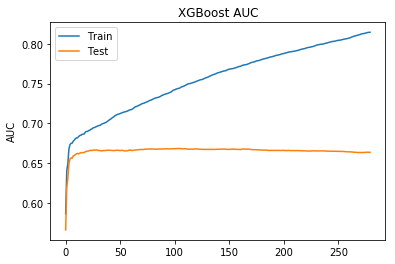

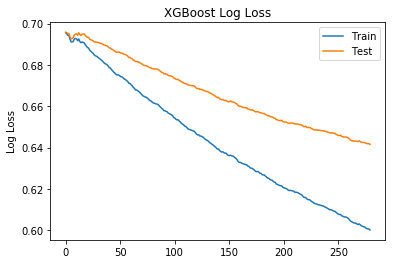

In [110]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)
# plot AUC
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [129]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score(y_test, model.predict(X_test))

In [124]:
bestscore

0.6520722967434944

In [130]:
AUC

0.6189122032559466

In [146]:
confusion_matrix(y_test, model.predict(X_test))

array([[14288,  8157],
       [ 1158,  1727]])

In [136]:
import pickle

In [138]:
with open('xgboost_pickle', 'wb') as picklefile:
    pickle.dump(model, picklefile)

In [141]:
loadedmodel = pickle.load(open('xgboost_pickle', 'rb'))

In [143]:
y = loadedmodel.predict_proba(X_test)[:,1]
print('auc for xgb:', roc_auc_score(y_test,y))

auc for xgb: 0.6635724453343104


In [163]:
type(loadedmodel.predict(X_test))

numpy.ndarray

In [144]:
roc_auc_score(y_test, loadedmodel.predict(X_test))

0.6175959103574191

In [145]:
print(confusion_matrix(y_test, loadedmodel.predict_proba(X_test)[:,1]))

[[14288  8157]
 [ 1158  1727]]
